# 검색시스템&클러스터링 실습

220415, by wygo

- [ref1](https://github.com/VishalKanakamamidi/Large-Scale-Face-Recognition)
- [ref2](https://github.com/facebookresearch/faiss)
- [ref3](https://github.com/facebookresearch/faiss/blob/main/tutorial/python/1-Flat.py)

### 경로명에 한글이 있으면 안읽힌다

In [ ]:
## prepare data
# down the EfficientNet&Adversarial code&data
!git clone https://github.com/airobotlab/advanced_cnn.git
!unzip advanced_cnn/data_president.zip  # president data
!rm -rf advanced_cnn

# 1_Face Detection&Recognition 실습

https://github.com/serengil/deepface

!pip install deepface

In [1]:
!pip install deepface==0.0.74

In [2]:
# load library
from deepface import DeepFace
from pprint import pprint
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

{'detector_backend': 'opencv',
 'distance': 0.3431723621100845,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': True}


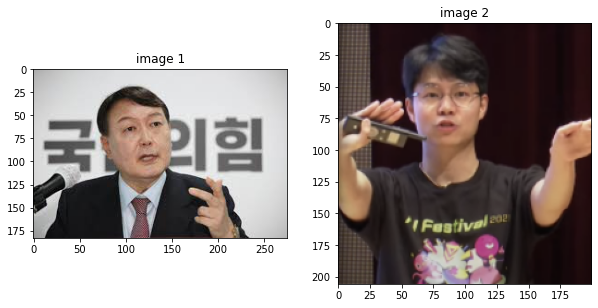

In [3]:
## 1_image verify
img1_path = 'test1.jpg'
img2_path = 'test4.jpg'
result = DeepFace.verify(img1_path=img1_path, img2_path=img2_path)
pprint(result)

query_image = Image.open(img1_path)
first_image = Image.open(img2_path)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('image 1')
plt.imshow(query_image)

plt.subplot(122)
plt.title('image 2')
plt.imshow(first_image)

plt.show()

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.66it/s]

{'age': 33,
 'dominant_emotion': 'sad',
 'dominant_race': 'asian',
 'emotion': {'angry': 1.867866888642311,
             'disgust': 5.3535087474188e-07,
             'fear': 9.24883857369423,
             'happy': 0.00040961122067528777,
             'neutral': 43.256571888923645,
             'sad': 45.61874270439148,
             'surprise': 0.0075654141255654395},
 'gender': 'Man',
 'race': {'asian': 99.7871994972229,
          'black': 2.502049198938039e-05,
          'indian': 0.11423757532611489,
          'latino hispanic': 0.08078439277596772,
          'middle eastern': 1.35076696494707e-06,
          'white': 0.017756159650161862},
 'region': {'h': 63, 'w': 63, 'x': 54, 'y': 33}}


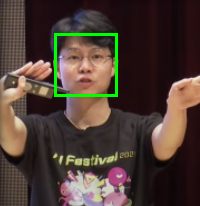

In [4]:
## 2_analyze face
img_path = 'test4.jpg'
analysis = DeepFace.analyze(img_path=img_path, actions = ['age', 'gender', 'race', 'emotion'])

pprint(analysis)

# plot image&check
query_image = Image.open(img_path)
draw = ImageDraw.Draw(query_image)
x = analysis['region']['x']
y = analysis['region']['y']
w = analysis['region']['w']
h = analysis['region']['h']
draw.rectangle((x, y, x+h, y+w), outline=(0,255,0), width = 3)
query_image

# 2_Faiss 검색시스템 기초 예시

[Tutorial](https://github.com/facebookresearch/faiss/blob/main/tutorial/python/1-Flat.py)

!pip install faiss-gpu

In [5]:
# !pip install faiss-gpu
!pip install faiss-cpu

In [6]:
## 1_define DB and query
import faiss  
import numpy as np

d = 3                           # dimension
nb = 1000                      # database size
nq = 10                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.


# DB 입력, list의 list를 numpy array 형태로
# array([[0.19151945, 0.62210876, 0.43772775],
#        [0.7863586 , 0.77997583, 0.2725926 ],
#        [0.27846426, 0.8018722 , 0.95813936],

In [7]:
## 2_make indexer
# IndexFlatL2: brute-force L2 distance
# IndexFlatIP: Cosine Similarity

index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)

True
1000


In [8]:
## 3_fine similar sample in DB with query
k = 4                          # we want to see 4 nearest neighbors
Distance, Index = index.search(xb[:5], k) # sanity check, (10000, 4)
print(Index)  # 가장 가까운것부터 idx, 0은 [0, 393, 363, 78]
print(Distance)

# 100000개의 데이터가 저장되어 있고, 그 중 10000개의 입력 쿼리와 비슷한 k개의 idx를 return 한다
Distance, Index = index.search(xq, k)     # actual search, (10000, 4)
print(Index[:5])                   # neighbors of the 5 first queries
print(Index[-5:])                  # neighbors of the 5 last queries

[[  0  30 110  20]
 [  1 689 422 328]
 [  2 290 179 242]
 [  3 767  25   9]
 [  4 428 136  71]]
[[0.         0.01115326 0.01320647 0.01457216]
 [0.         0.00284799 0.00717399 0.00966942]
 [0.         0.00701063 0.01130206 0.01750232]
 [0.         0.00285048 0.00680745 0.01277619]
 [0.         0.00349371 0.00654847 0.00877594]]
[[620 690 450 710]
 [104  80  21 109]
 [158 276 370 230]
 [551 176 476 520]
 [129  52 141 745]]
[[239 166 179 174]
 [108 410 401 463]
 [598 432 576 235]
 [520 107 524 219]
 [505 404  86 292]]


# 3_Face search system


In [9]:
## install library
# !pip install faiss-gpu
# !pip install deepface
# !pip install tensorflow==2.3

In [10]:
# prepare face data
# !unzip data_president_small.zip

In [11]:
## import library
from deepface import DeepFace
from deepface.basemodels import Facenet, FbDeepFace, VGGFace, OpenFace
# from deepface.basemodels import DeepFace
from deepface.commons import functions, realtime, distance as dst
import pandas as pd
import numpy as np
import faiss
from faiss import *
import os
import timeit
import time
import matplotlib.pyplot as plt 
from tqdm import tqdm
import glob
import pickle
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [12]:
## config
# model = VGGFace  # Or FbDeepFace Or VGGFace Or OpenFace
model = Facenet  # Or FbDeepFace Or VGGFace Or OpenFace
# model = FbDeepFace  # Or FbDeepFace Or VGGFace Or OpenFace
# model = OpenFace  # Or FbDeepFace Or VGGFace Or OpenFace

if (model == Facenet):
    model = Facenet.loadModel()
    dim = 128
    input_shape = 160
if (model == FbDeepFace):
    model = FbDeepFace.loadModel()
    dim = 4096
    input_shape = 152
if (model == VGGFace):
    model = VGGFace.loadModel()
    dim = 2622
    input_shape = 224
if (model == OpenFace):
    model = OpenFace.loadModel()
    dim = 128
    input_shape = 96

# Similarity_Metric = 'L2'
image_DB_folder = 'data_president/data_president_small'  # 대량의 이미지가 닮긴 폴더. 이 중 비슷한 이미지를 찾을것임
Similarity_Metric = 'Cosine'
faces_embedding_file = 'face_embedding.csv'

## ready!!
# ready = False
ready = True

In [13]:
## functions
## for face detection
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]  # 241, 93, 647, x, 1.44s
detector = detectors[2]  # mtcnn
face_detector = DeepFace.detectFace

def get_face_encodings(image_path, model):
    # 1) 얼굴 부분을 찾아서 정렬, resize
    #face detection and alignment
    face_image = face_detector(image_path, target_size=(input_shape, input_shape), detector_backend = detectors[4])  # 224x224x3, 0~1
    # plt.imshow(face_image)

    # 2) 얼굴의 representation 값을 가져온다
    start_time = time.time()
    face_image_expand = np.expand_dims(face_image, axis=0)  # (224x224x3) -> (1x224x224x3), model에서 batchsize가 필요하므로 확장
    face_representation = model.predict(face_image_expand)[0, :]  # (2622,), -0.x~0.x
#     print("--- %s seconds ---" % (time.time() - start_time))    

    return face_representation


def register_faces_in_dataset(faces_dataset='data_president_small', 
                              model='', 
                              faces_embedding_file='face_embedding.csv'):
    
    ## dataset이 폴더건, 폴더 안의 폴더건 다 되도록
    # 바로 하위에 이미지가 있을때
    list_jpg = glob.glob(os.path.join(faces_dataset, '*.jpg'), recursive = True)  # 하위 모든 jpg 파일들을 찾아서 list로
    list_png = glob.glob(os.path.join(faces_dataset, '*.png'), recursive = True)
    # 폴더 아래 또 폴더가있을 때
    if len(list_jpg+list_png) == 0:
        list_jpg = glob.glob(os.path.join(faces_dataset, '*', '*.jpg'), recursive = True)  # 하위 모든 jpg 파일들을 찾아서 list로
        list_png = glob.glob(os.path.join(faces_dataset, '*', '*.png'), recursive = True)
    list_image = list_jpg + list_png
    print('num of Image DB : %d'%len(list_image))
    
#     list_image = os.listdir(faces_dataset)    
    with open(faces_embedding_file, 'w') as f_csv:
        # 첫행 first_row 'id,1,2, ...2622,\n'
        first_row = ','.join([str(tmp) for tmp in (['id']+list(range(1, dim + 1)))])+'\n'
        f_csv.write(first_row)

        for image_path in tqdm(list_image):
            # face encoding, 얼굴 찾고 정렬, representation 뽑는다
            try:
                encoding = get_face_encodings(image_path, model)

                # embedding csv에 저장
                string = image_path + ',' + ','.join([str(tmp) for tmp in list(encoding)]) + '\n'
                # print(string)
                f_csv.write(string)
            
            except Exception as error: # 에러 종류
                print('error!!, %s / %s'%(image_path, error)) # ex는 발생한 에러의 이름을 받아오는 변수
                pass
                # 에러가 발생 했습니다 list index out of range            
            
    print('embedding complete')
    

def getting_id_index(faces_embedding_file='face_embedding.csv', Similarity_Metric='L2'):  # for getting faces identities and corresponding encodings in numpy format for matching.
    # Similarity_Metric: 0 for L2 distance Similarity, 1 for Cosine Similarity

    df = pd.read_csv(faces_embedding_file)
    face_identities = []
    if (Similarity_Metric == 'L2'):
        face_index = faiss.IndexFlatL2(dim)
    if (Similarity_Metric == 'Cosine'):
        face_index = faiss.IndexFlatIP(dim)  # inner product
#     print(face_index.is_trained)

    for _, row in df.iterrows():
        identity = row["id"]
        # print(row.iloc[1:dim+1])
        embedding = row.iloc[1:dim + 1].to_numpy().astype('float32')  # 첫번째는 id니까 제외
        embedding = np.ascontiguousarray(embedding.reshape(1, dim))
        # print(embedding)
        # embedding = embedding[0]
        if (Similarity_Metric == 'Cosine'):
            normalize_L2(embedding)

        face_index.add(embedding)
        face_identities.append(identity)

    print('faiss indexing complete')
    return face_identities, face_index


def find_face_name(query_image_path, model, face_index, face_identities, top_k=3):  # for matching
    
    identity, list_idx, list_distance = None, None, None
    
    try:
        # 1) 얼굴찾고 정렬한 후 임베딩
        encoding = get_face_encodings(query_image_path, model)    

        encoding = np.reshape(encoding, (1, dim))  # (1, 2622)
        if (Similarity_Metric == 'Cosine'):
            normalize_L2(encoding)

        # find face in faiss DB
        list_distance, list_idx = face_index.search(encoding, 3)
        list_distance = list_distance[0]  # 첫번쨰 차원은 batch므로 제외
        list_idx = list_idx[0]

        identity = face_identities[list_idx[0]]
        print(identity)
    
    except:
        print('There is no face!!. Not human')
        
    return identity, list_idx, list_distance


In [14]:
## 1) save emgedding
if not ready:
    register_faces_in_dataset(faces_dataset=image_DB_folder, model=model, faces_embedding_file=faces_embedding_file)
else:
    print('already done')

already done


In [15]:
## 2) make faiss search indexer
if not ready:
    ## 2) make faiss indexer
    # face_identities(image path) : ['Faces-Dataset\\Chris', 'Faces-Dataset\\Hrithik', ..]
    # face_index: faiss indexing
    face_identities, face_index = getting_id_index(faces_embedding_file=faces_embedding_file, \
                                                   Similarity_Metric=Similarity_Metric)

    # save
    with open('face_faiss.pickle', 'wb') as f:
        pickle.dump([face_identities, face_index], f, pickle.HIGHEST_PROTOCOL)
else:
    print('already done')
    
# load
with open('face_faiss.pickle', 'rb') as f:
    face_identities, face_index = pickle.load(f)

already done


## Inference

data_president_small/2_YSR/google_0014.jpg


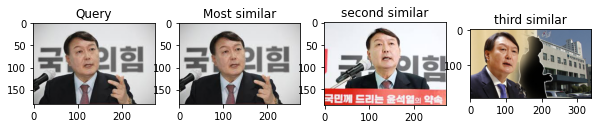

Wall time: 8.53 s


In [16]:
%%time
## 3) find face query in DB

query = 'test1.jpg'

identity, list_idx, list_distance = find_face_name(query_image_path=query, model=model, face_index=face_index, face_identities=face_identities)

## 이미지 검색 체크
if list_idx is not None:
    query_image = Image.open(query)
    first_image = Image.open(face_identities[list_idx[0]])
    second_image = Image.open(face_identities[list_idx[1]])
    third_image = Image.open(face_identities[list_idx[2]])

    plt.figure(figsize=(10,10))

    plt.subplot(141)
    plt.title('Query')
    plt.imshow(query_image)

    plt.subplot(142)
    plt.title('Most similar')
    plt.imshow(first_image)

    plt.subplot(143)
    plt.title('second similar')
    plt.imshow(second_image)

    plt.subplot(144)
    plt.title('third similar')
    plt.imshow(third_image)

    plt.show()
else:
    print('Not human')

data_president_small/1_LJM/google_0008.jpg


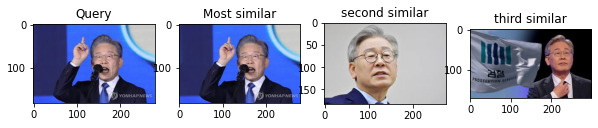

Wall time: 2.1 s


In [17]:
%%time
## 3) find face query in DB

query = 'test2.jpg'

identity, list_idx, list_distance = find_face_name(query_image_path=query, model=model, face_index=face_index, face_identities=face_identities)

## 이미지 검색 체크
if list_idx is not None:
    query_image = Image.open(query)
    first_image = Image.open(face_identities[list_idx[0]])
    second_image = Image.open(face_identities[list_idx[1]])
    third_image = Image.open(face_identities[list_idx[2]])

    plt.figure(figsize=(10,10))

    plt.subplot(141)
    plt.title('Query')
    plt.imshow(query_image)

    plt.subplot(142)
    plt.title('Most similar')
    plt.imshow(first_image)

    plt.subplot(143)
    plt.title('second similar')
    plt.imshow(second_image)

    plt.subplot(144)
    plt.title('third similar')
    plt.imshow(third_image)

    plt.show()
else:
    print('Not human')

There is no face!!. Not human
Not human
Wall time: 1.39 s


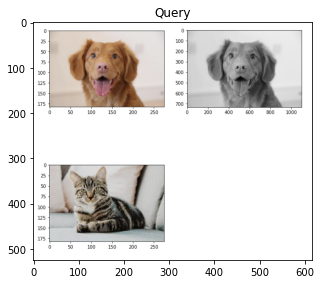

In [18]:
%%time
## 3) find face query in DB

query = 'test3.jpg'

identity, list_idx, list_distance = find_face_name(query_image_path=query, model=model, face_index=face_index, face_identities=face_identities)

## 이미지 검색 체크
if list_idx is not None:
    query_image = Image.open(query)
    first_image = Image.open(face_identities[list_idx[0]])
    second_image = Image.open(face_identities[list_idx[1]])
    third_image = Image.open(face_identities[list_idx[2]])

    plt.figure(figsize=(10,10))

    plt.subplot(141)
    plt.title('Query')
    plt.imshow(query_image)

    plt.subplot(142)
    plt.title('Most similar')
    plt.imshow(first_image)

    plt.subplot(143)
    plt.title('second similar')
    plt.imshow(second_image)

    plt.subplot(144)
    plt.title('third similar')
    plt.imshow(third_image)

    plt.show()
else:
    print('Not human')
    query_image = Image.open(query)
    plt.figure(figsize=(5,5))
    plt.title('Query')
    plt.imshow(query_image)    

data_president_small/4_ACS/naver_0098.jpg


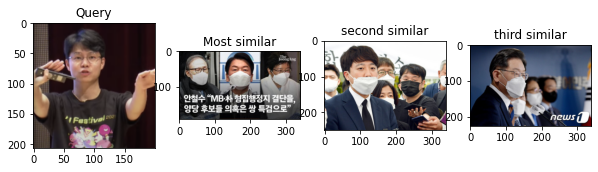

Wall time: 1.5 s


In [19]:
%%time
## 3) find face query in DB

query = 'test4.jpg'

identity, list_idx, list_distance = find_face_name(query_image_path=query, model=model, face_index=face_index, face_identities=face_identities)

## 이미지 검색 체크
if list_idx is not None:
    query_image = Image.open(query)
    first_image = Image.open(face_identities[list_idx[0]])
    second_image = Image.open(face_identities[list_idx[1]])
    third_image = Image.open(face_identities[list_idx[2]])

    plt.figure(figsize=(10,10))

    plt.subplot(141)
    plt.title('Query')
    plt.imshow(query_image)

    plt.subplot(142)
    plt.title('Most similar')
    plt.imshow(first_image)

    plt.subplot(143)
    plt.title('second similar')
    plt.imshow(second_image)

    plt.subplot(144)
    plt.title('third similar')
    plt.imshow(third_image)

    plt.show()
else:
    print('Not human')

# 4_K-means clustering

- [ref1, sklearn kmeans](https://nicola-ml.tistory.com/60?category=806493)  
- [ref2, faiss kmeans](https://towardsdatascience.com/20x-times-faster-k-means-clustering-with-faiss-5e1681fa2654)
- [ref3, K값 구하기](https://nicola-ml.tistory.com/66?category=806493)

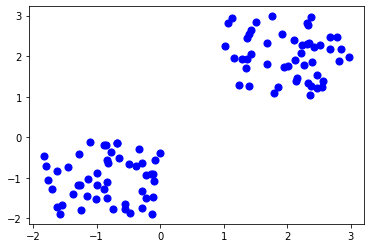

[[-0.84112356 -1.02072982]
 [ 2.0184953   2.0217565 ]]
[-0.84112356 -1.02072982]


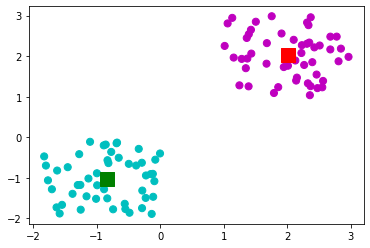

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
# k-means clustring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X= -2*np.random.rand(100,2)
X1 = 1+2*np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.show()

from sklearn.cluster import KMeans
# Kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

print(Kmean.cluster_centers_)
print(Kmean.cluster_centers_[0])

list_color = ['c' if idx_class == 0 else 'm' for idx_class in Kmean.labels_ ]
plt.scatter(X[ : , 0], X[ : , 1], s =50, c=list_color)
plt.scatter(Kmean.cluster_centers_[0][0], Kmean.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0], Kmean.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.show()

print(Kmean.labels_)

## To get a K!!

In [21]:
## to get a K
import faiss
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    from scipy.spatial.distance import cdist
    
    distortions = []
    dimension = data.shape[1]
    
    print(data.shape)
    
    for i in range(1, 10):

        # for sklearn kmeans
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

        
        # for faiss kmeans
#         kmeans = faiss.Kmeans(dimension, i, niter=param_max_iter, verbose=True)
#         kmeans.train(data)
#         SSE = (sum(np.min(cdist(data, kmeans.centroids, 'euclidean'), axis=1)) / data.shape[0])        
#         distortions.append(SSE)
        
    plt.plot(range(1, 10), distortions, marker='o')
    plt.title('The Elbow Method showing the optimal k')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

    
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    from sklearn.metrics import silhouette_samples, silhouette_score
    import seaborn as sns
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

(100, 2)


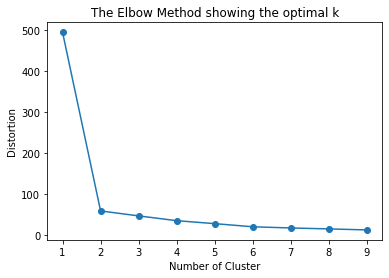

In [22]:
visualize_elbowmethod(X)

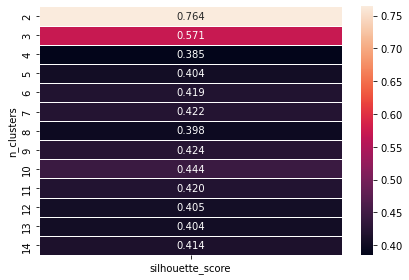

In [23]:
visualize_silhouette_layer(X)

In [24]:
## k-means clustering with faiss

import faiss
import numpy as np

D = 128
N = 10000
K = 10  # The number of clusters
X = np.random.random((N, D)).astype(np.float32)

# Setup
kmeans = faiss.Kmeans(d=D, k=K, niter=20, verbose=True)
# For GPU(s), run the following line. This will use all GPUs
# kmeans = faiss.Kmeans(d=D, k=K, niter=20, verbose=True, gpu=True)

# Run clustering
s = time.time()
kmeans.train(X)
e = time.time()
print("Training time = {}".format(e - s))

# Error for each iteration
print(kmeans.obj)  # array with 20 elements

# Centroids after clustering
print(kmeans.centroids.shape)  # (10, 128)

# The assignment for each vector.
# 0~9까지 10개 중 한개의 cluster로 묶음
s = time.time()
dists, ids = kmeans.index.search(X, 1)  # Need to run NN search again
print("Prediction time = {}".format((e - s) / len(X)))
print(ids.shape)  # (10000, 1)

# Params
print("D:", kmeans.d)
print("K:", kmeans.k)
print("niter:", kmeans.cp.niter)

Training time = 0.013473272323608398
[47136.3203125  26663.22460938 26581.12304688 26538.00585938
 26512.88085938 26496.6796875  26482.82421875 26474.40429688
 26467.2421875  26461.00390625 26454.27929688 26447.33789062
 26442.46484375 26439.390625   26436.65234375 26434.59179688
 26432.98046875 26431.99609375 26430.84570312 26430.39257812]
(10, 128)
Prediction time = -4.9686431884765625e-08
(10000, 1)
D: 128
K: 10
niter: 20


PCA example>
    <img src="https://blog.kakaocdn.net/dn/Yf4Hg/btqJFZJ5rso/V6QSvnxvPp4kQyZbVoH2bK/img.gif">
</figure>

In [25]:
# compute PCA
mt = np.random.rand(1000, 40).astype('float32')
mat = faiss.PCAMatrix (40, 10)
mat.train(mt)
assert mat.is_trained
tr = mat.apply_py(mt)
# print this to show that the magnitude of tr's columns is decreasing
print((tr**2).sum(0))

[117.997055 113.493835 112.003586 110.54241  107.288025 103.62874
 100.91911  100.608086  97.87459   97.018005]


# 5_Clustering practice

[ref](https://runebook.dev/ko/docs/scikit_learn/auto_examples/manifold/plot_lle_digits)

In [26]:
!pip install mglearn

In [27]:
# load
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

digits = datasets.load_digits(n_class=6)
X = digits.data  # 64d (8x8)
y = digits.target
n_samples, n_features = X.shape  # 64
n_neighbors = 30

print('data: %d, dimension: %d'%(n_samples, n_features))

data: 1083, dimension: 64


Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

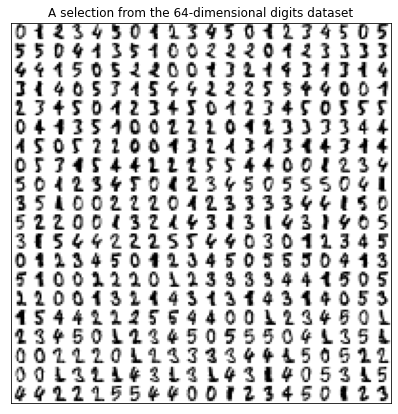

In [28]:
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap projection
Done.
Computing t-SNE embedding


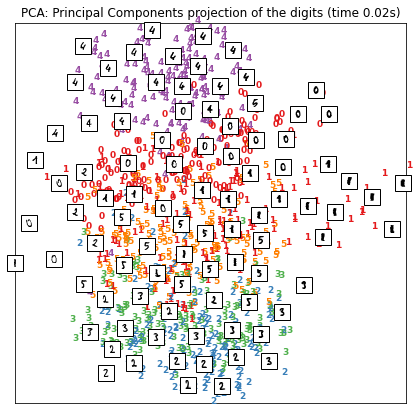

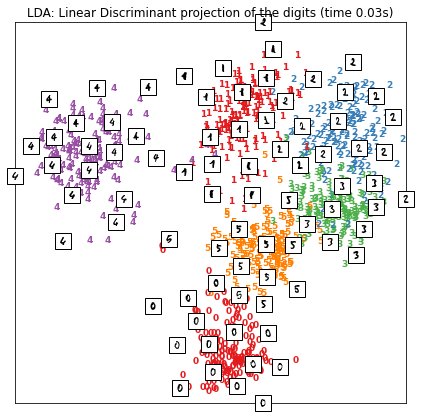

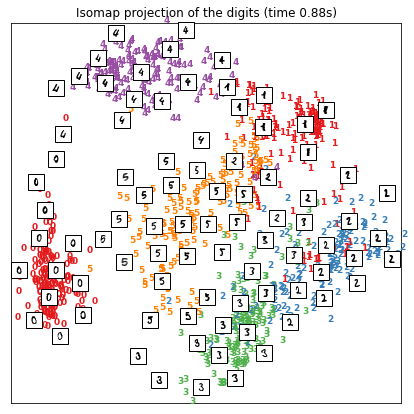

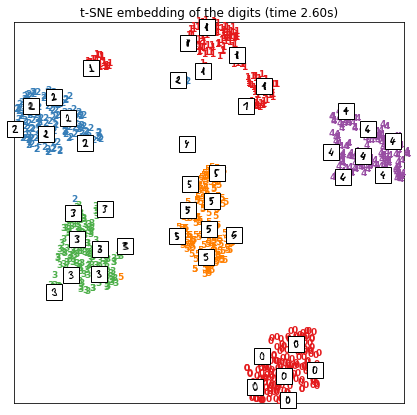

In [29]:
#############################################################
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



#############################################################
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "PCA: Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#############################################################
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2
                                                         ).fit_transform(X2, y)
plot_embedding(X_lda,
               "LDA: Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


#############################################################
# Isomap projection of the digits dataset
print("Computing Isomap projection")
t0 = time()
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2
                        ).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))

#############################################################
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


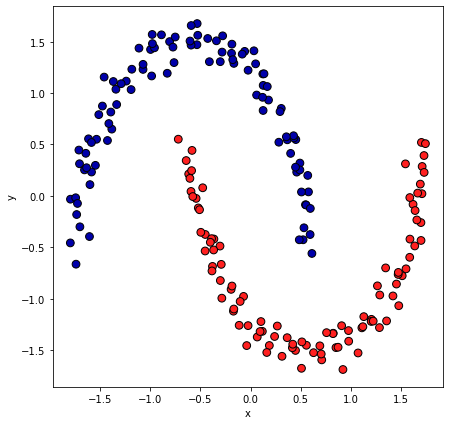

In [30]:
# DBSCAN, no need K
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)  # (Nx2)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("x")
plt.ylabel("y")
print(clusters)

# 6_t-SNE plot

[ref](https://github.com/EvgenyDyshlyuk/Deep_Learning_Face_Detection_Embeddings_Clustering)

In [31]:
## 1_make embedding array
import random

df = pd.read_csv(faces_embedding_file)
list_embedding, list_path, list_label = [], [], []
for _, row in df.iterrows():
    image_path = row["id"]
    # print(row.iloc[1:dim+1])
    embedding = row.iloc[1:dim + 1].to_numpy().astype('float32')  # 첫번째는 id니까 제외
    embedding = np.ascontiguousarray(embedding.reshape(1, dim))
    # print(embedding)
    # embedding = embedding[0]
    if (Similarity_Metric == 'Cosine'):
        normalize_L2(embedding)
        
    if random.random() < 0.3:
        list_path.append(image_path)
        list_label.append(image_path.split('/')[1].split('_')[-1])  # 윈도우일땐 / 대신 \\로 변경
        list_embedding.append(list(embedding[0]))

np_embedding = np.array(list_embedding)
assert len(list_path)==len(np_embedding)==len(list_label), print(len(list_path), len(np_embedding), len(list_label))
print('num: %d'%(len(list_path)))

num: 411


In [32]:
## 2_차원축소 using PCA or T-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Calculate t-SNE
# model = PCA(n_components=2)
model = TSNE(perplexity=2, init='pca', random_state=0)

X_ = model.fit_transform(np_embedding)  # dimension -> 2

x = X_[:,0]  # N
y = X_[:,1]  # N

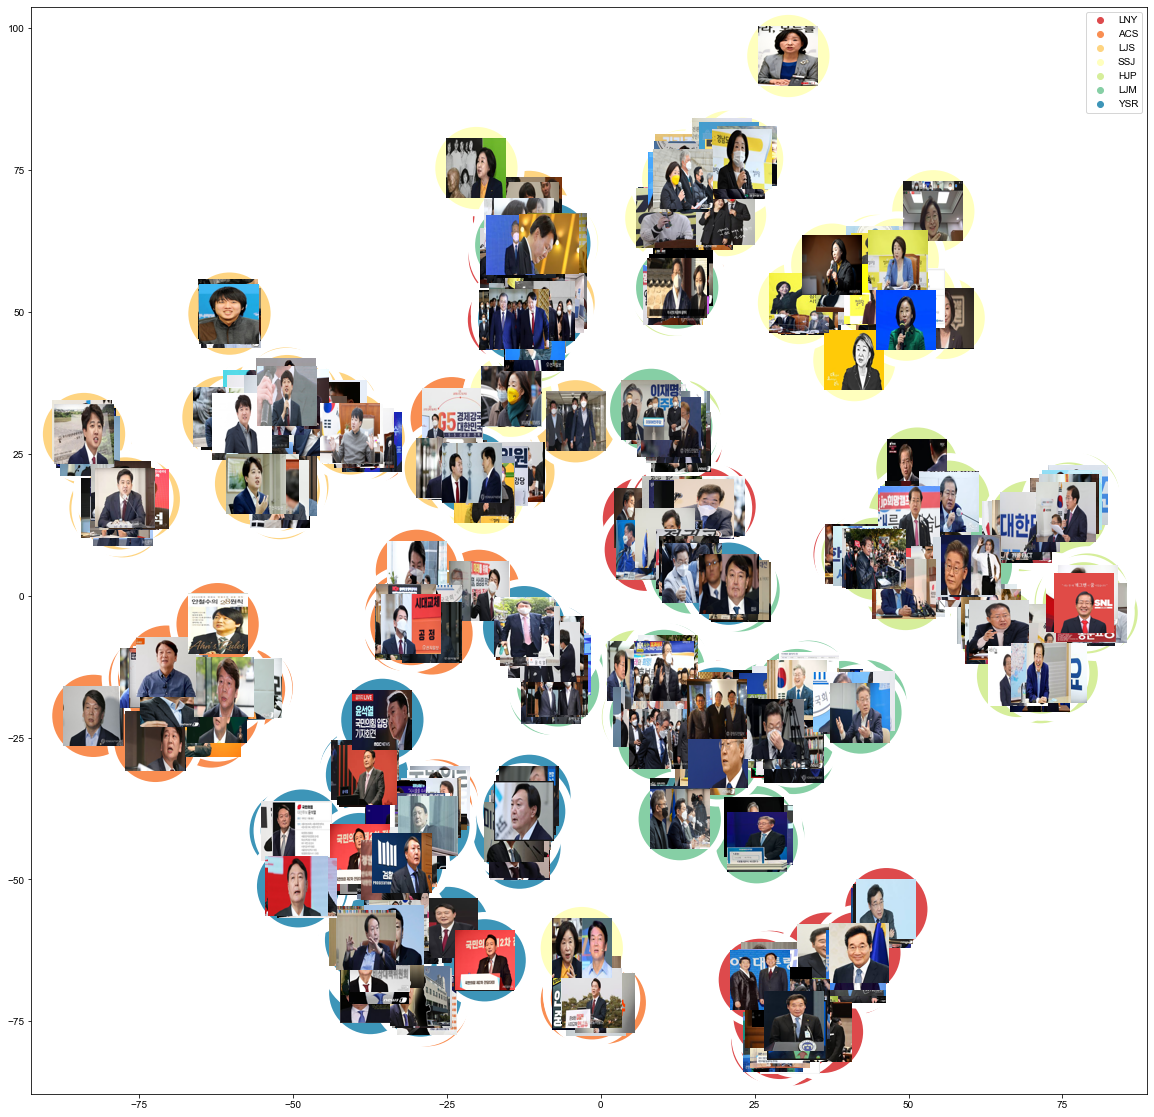

In [33]:
## 3_Plot
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from PIL import Image
import seaborn as sns

def getImage(path, size):
    # 이미지 열어서 (50,50)로 resize 후 (50,50,3)의 numpy array로 변환
    image = Image.open(path)
    image_resize = image.resize(size)
    np_array = np.array(image_resize)
    return OffsetImage(np_array)

plt.rcParams["figure.figsize"] = (20,20)
# This part is plotting faces
fig, ax = plt.subplots()
ax.scatter(x, y)

for x0, y0, path in zip(x, y, list_path):
    try:
        ab = AnnotationBbox(getImage(path, (60,60)), (x0, y0), frameon=False)
        ax.add_artist(ab)
    except:
        print('error!, %s'%path)

# This part is plotting colors
sns.scatterplot(x=x, y=y, hue=list_label, s=8000, palette=sns.color_palette('Spectral',len(set(list_label))))
#plt.legend([],[], frameon=False) # hide the legend if it too long

# Set figure background
sns.set_style("whitegrid", {'axes.grid' : False,'axes.facecolor': 'white'})
plt.savefig('image_cluestering.jpg')

# Image search system done!!

In [34]:
print('done!')

done!
